![](task/1.png)

In [4]:
from sympy import *
import numpy as np
from numba import njit, prange
from collections import defaultdict
import matplotlib.pyplot as plt

# 1.1.8, 1.5.2, 1.7, 1.6, 1.9.2

# Задание

$$a_n = \frac{32}{n^2+9n+20}$$
$$S = \sum\limits_{n=0}^\infty a_n$$
$$S_N = \sum\limits_{n=0}^N a_n$$

1. Найти сумму ряда $S$ аналитически.
2. Найти частичные суммы ряда $S_N$ при $N = 10, 10^2, 10^3, 10^4, 10^5$.
3. Вычислить погрешности для каждого N.
4. Вычислить количество значащих цифр для каждого N.
5. Построить гистограмму зависимости верных цифр результата от $N$.

# Решение

## Задача 1.

Найти сумму ряда $S$ аналитически.

## Задача 2, 3, 4.

- Найти частичные суммы ряда $S_N$ при $N = 10, 10^2, 10^3, 10^4, 10^5$.
- Вычислить погрешности для каждого N.
- Вычислить количество значащих цифр для каждого N.

### Теоретическая справка

Фото

### Вычисления

In [71]:
def calculateNum(n: int):
    return 32 / (n ** 2 + 9 * n + 20)


def calculateSum(N: int):
    sum = 0
    for n in prange(N):
        sum += calculateNum(n)
    return sum

In [72]:
N_list = [10 ** k for k in range(1, 6)]
# N_list = [100]

sums = {}
errors = {}
digits = defaultdict(int)
exact_sum = 8

for N in N_list:
    sums[N] = calculateSum(N)
    errors[N] = abs(sums[N] - exact_sum)

for N in N_list:
    i = -1
    for i in range(-1, 50):
        order_of_error = 1 / (10 ** i)
        if errors[N] <= order_of_error:
            digits[N] += 1
        else:
            break

for N in N_list:
    print(f"{sums[N]}\t±\t{errors[N]} \tс {digits[N]} значащих цифр")

5.714285714285714	±	2.2857142857142856 	с 1 значащих цифр
7.69230769230769	±	0.30769230769231015 	с 2 значащих цифр
7.968127490039844	±	0.03187250996015578 	с 3 значащих цифр
7.9968012794882295	±	0.003198720511770503 	с 4 значащих цифр
7.999680012799457	±	0.00031998720054282614 	с 5 значащих цифр


## Задача 5.

Построить гистограмму зависимости верных цифр результата от $N$.

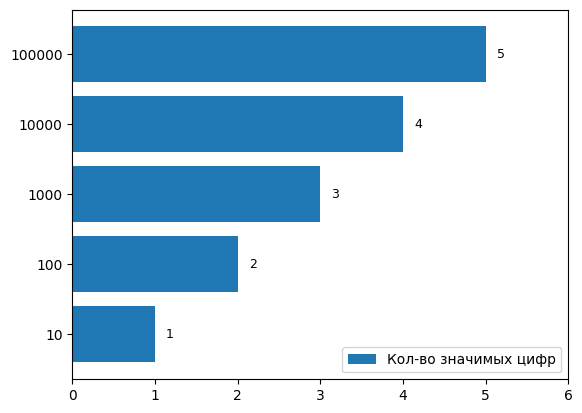

In [73]:
keys_list = list(map(str, sums.keys()))
errors_list = list(errors.values())
digits_list = list(digits.values())

bars = plt.barh(keys_list, errors_list, label='Погрешность')
plt.bar_label(bars, padding=8, fontsize=9)
plt.xlim(0, 14)
plt.legend()
# plt.savefig('plots/series_error.png', dpi=300)
plt.close()

bars = plt.barh(keys_list, digits_list, label='Кол-во значимых цифр')
plt.bar_label(bars, padding=8, fontsize=9)
plt.xlim(0, 6)
plt.legend()
# plt.savefig('plots/series_digits_list.png', dpi=300)

# Матрица

In [48]:
matrix = np.array([[30, 34, 19],
                   [31.4, 35.4, 20],
                   [24, 28, 13]])
alpha = 0.05
beta = 0.1

In [49]:
metrix_det = np.linalg.det(matrix)
metrix_det
# != => существует A^-1

9.600000000000069

In [50]:
delta_abs = alpha
delta_relative_matrix = np.empty((3, 3), dtype=float)
for i in range(3):
    for j in range(3):
        delta_relative_matrix[i][j] = delta_abs / matrix[i][j]

In [51]:
delta_relative_matrix

array([[0.00166667, 0.00147059, 0.00263158],
       [0.00159236, 0.00141243, 0.0025    ],
       [0.00208333, 0.00178571, 0.00384615]])

In [52]:
from itertools import product
variants = []
for i in range(9):
    variants.append([-1, 1])
pairs = list(product(*variants))

In [53]:
metrix_dets = []
delta_relative_matrix = delta_relative_matrix.reshape(9)
for pair in pairs:
    new_matrix = matrix.reshape(9)
    for i in range(9):
        new_matrix[i] += pair[i] * delta_relative_matrix[i]
    metrix_dets.append(np.linalg.det(new_matrix.reshape(3, 3)))

In [55]:
metrix_dets

[9.604952239596054,
 9.566812141726356,
 9.559566289230446,
 9.509179329614298,
 9.545035769909175,
 9.537813890695556,
 9.561500230747908,
 9.542059482491426,
 9.427439360913782,
 9.26960302482599,
 9.140930809506239,
 8.967923085313199,
 8.886626960091993,
 8.763544271007449,
 8.668914404431957,
 8.531378789026629,
 8.35143762788251,
 8.129382896867336,
 7.93296598723887,
 7.695689372254789,
 7.552098701605382,
 7.368566396745261,
 7.207636469543822,
 7.008018565736043,
 6.709577712481526,
 6.374106545946417,
 6.057338913891709,
 5.703724101828152,
 5.442268612583367,
 5.147368071361149,
 4.867414582121925,
 4.554199075808259,
 4.838337569943005,
 5.088140119262056,
 5.35135679838284,
 5.578955379352901,
 5.9023406811830155,
 6.1880757671339115,
 6.491428735100605,
 6.7558494322219635,
 6.921921367860106,
 7.046878106018361,
 7.19189920209778,
 7.293454522444134,
 7.501189938107293,
 7.665911862806186,
 7.85417425293645,
 7.997072780763028,
 8.099440661156246,
 8.155143018322002,
 8.

In [59]:
m = np.min(metrix_dets)
M = np.max(metrix_dets)
print(m, M)

4.554199075808259 52.18133333329476


In [60]:
if m < 0 < M:
    print("Определитель обращается в 0")
else:
    print("Определитель не обращается в 0")

Определитель не обращается в 0
